# Importing Dataset and Setup

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.decomposition import FastICA
from scipy.signal import butter, lfilter

In [ ]:
drive.mount('/content/drive')
eeg_data = pd.read_csv("/content/drive/MyDrive/EEG_Eye_State_Classification.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Studying dataset

In [ ]:
eeg_data

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


### Measures of Statistics for each electrode

In [ ]:
eeg_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AF3,14980.0,4321.917777,2492.072174,1030.7700,4280.51,4294.36,4311.79,309231.00
F7,14980.0,4009.767694,45.941672,2830.7700,3990.77,4005.64,4023.08,7804.62
F3,14980.0,4264.022433,44.428052,1040.0000,4250.26,4262.56,4270.77,6880.51
FC5,14980.0,4164.946326,5216.404632,2453.3300,4108.21,4120.51,4132.31,642564.00
T7,14980.0,4341.741075,34.738821,2089.7400,4331.79,4338.97,4347.18,6474.36
P7,14980.0,4644.022379,2924.789537,2768.2100,4611.79,4617.95,4626.67,362564.00
O1,14980.0,4110.400160,4600.926543,2086.1500,4057.95,4070.26,4083.59,567179.00
O2,14980.0,4616.056904,29.292603,4567.1800,4604.62,4613.33,4624.10,7264.10
P8,14980.0,4218.826610,2136.408523,1357.9500,4190.77,4199.49,4209.23,265641.00
T8,14980.0,4231.316200,38.050903,1816.4100,4220.51,4229.23,4239.49,6674.36


# Signal Preprocessing

### Plotting electrodes signals before artifacts removal



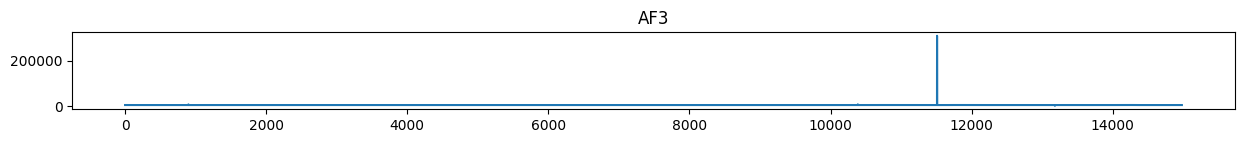

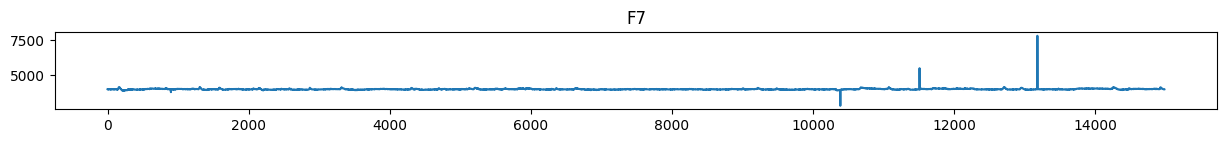

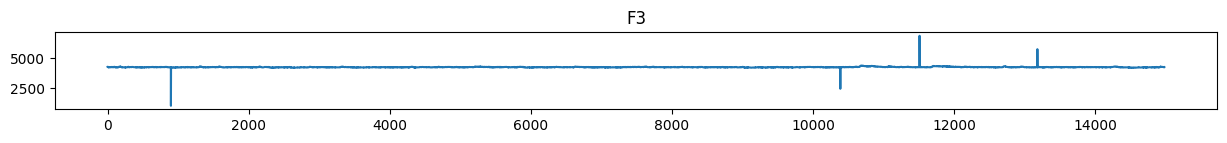

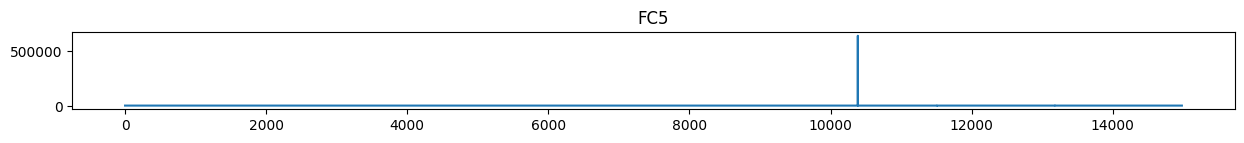

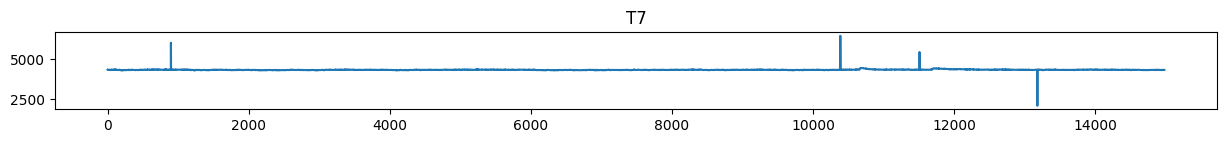

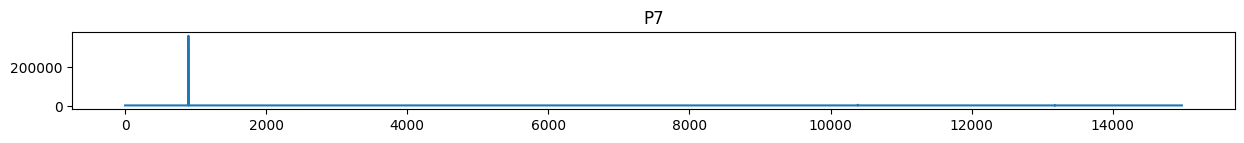

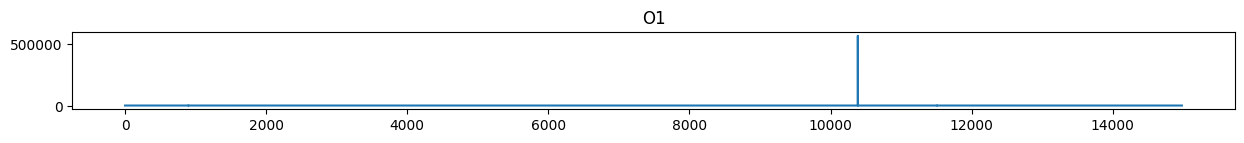

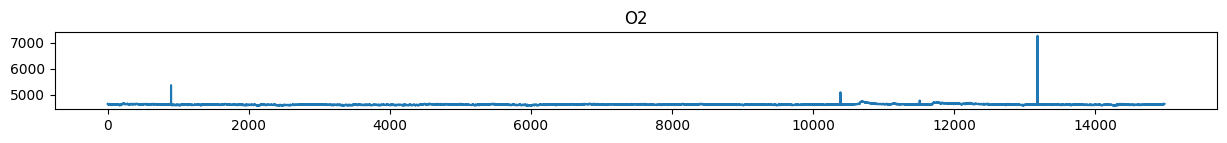

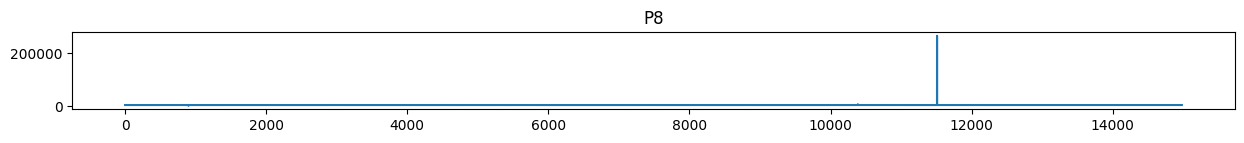

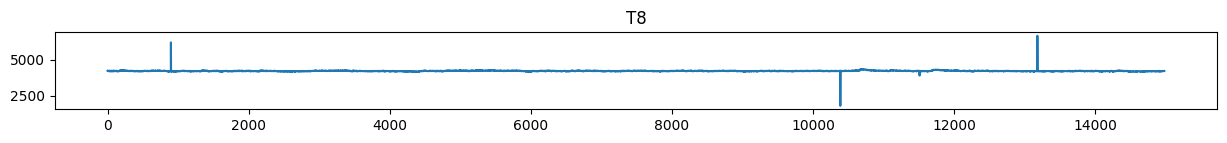

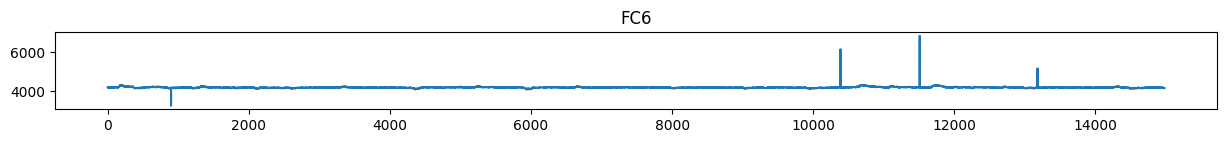

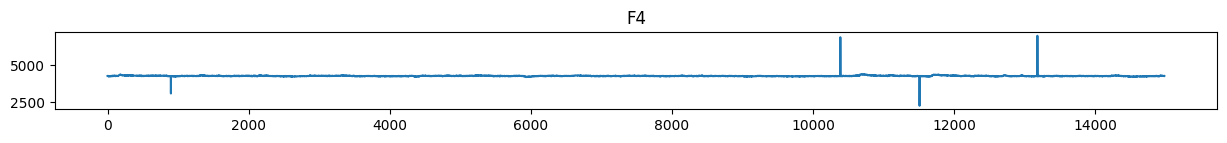

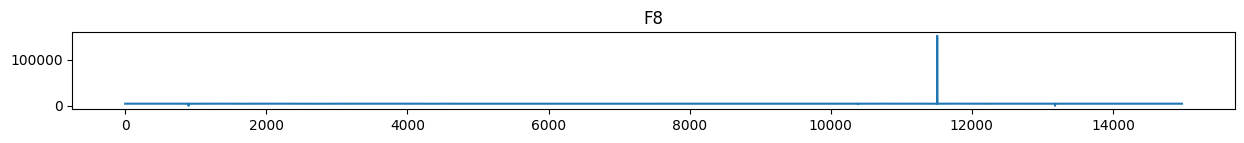

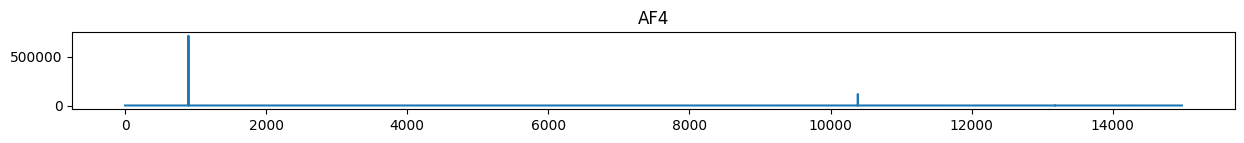

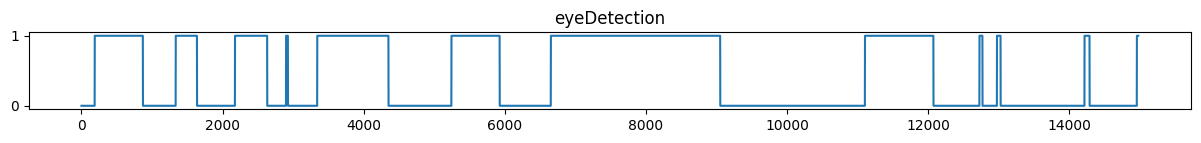

In [ ]:
for electrode in eeg_data.columns:
    eeg_data[electrode].plot(figsize=(15, 1), title=electrode)
    plt.show()

### Artifacts removal using z-scores

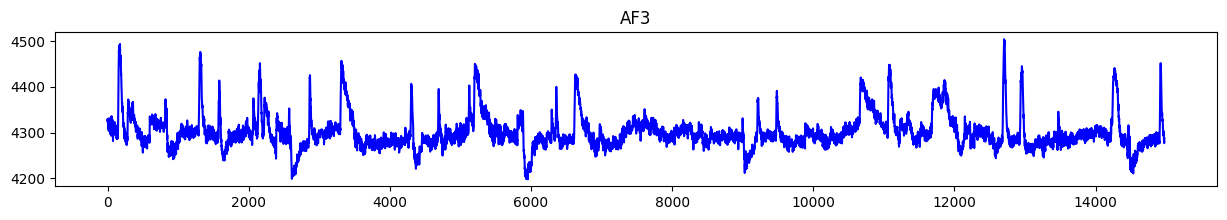

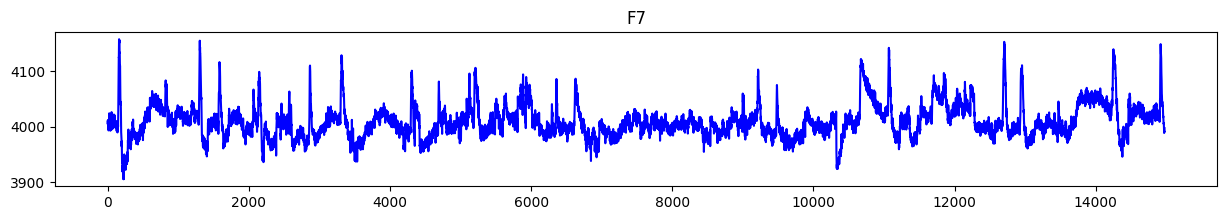

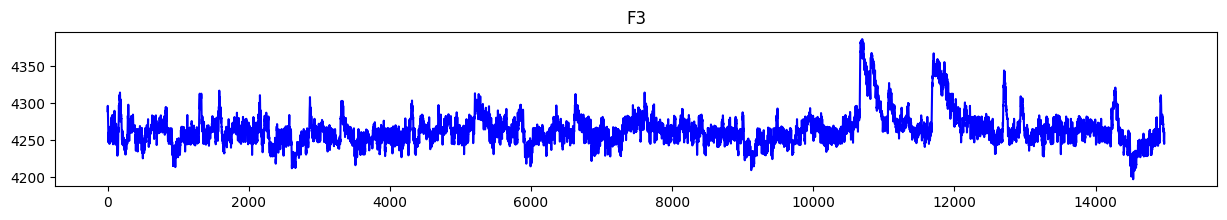

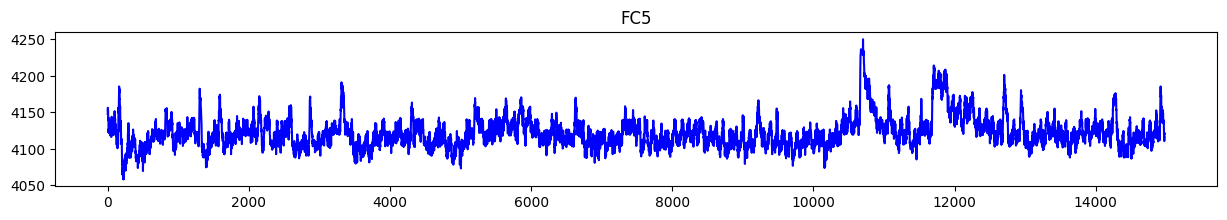

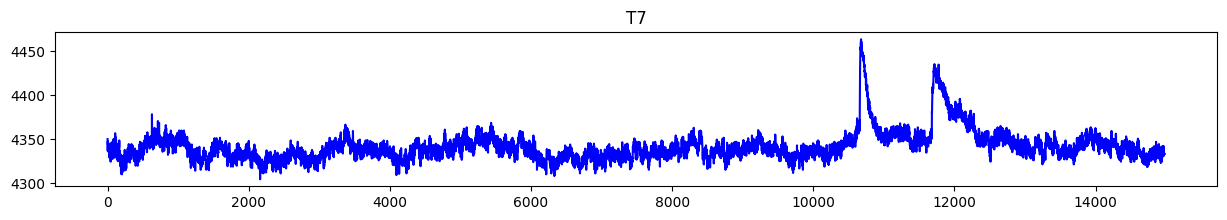

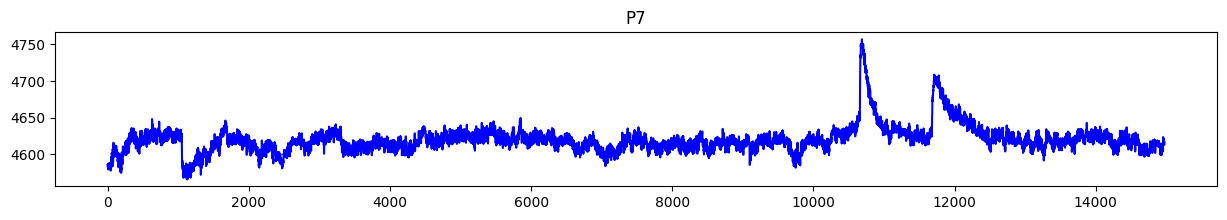

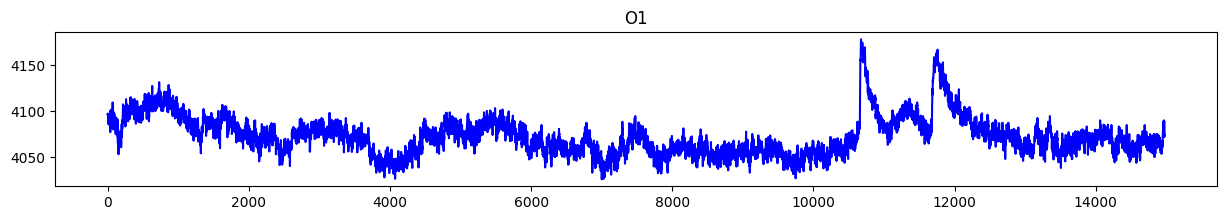

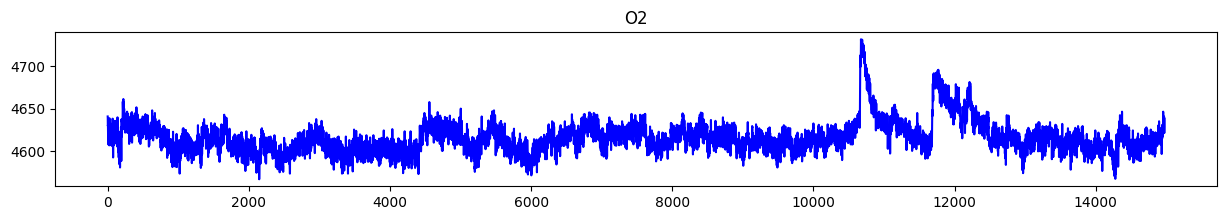

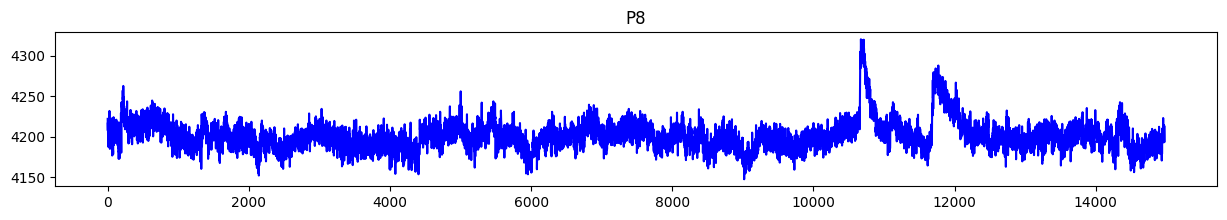

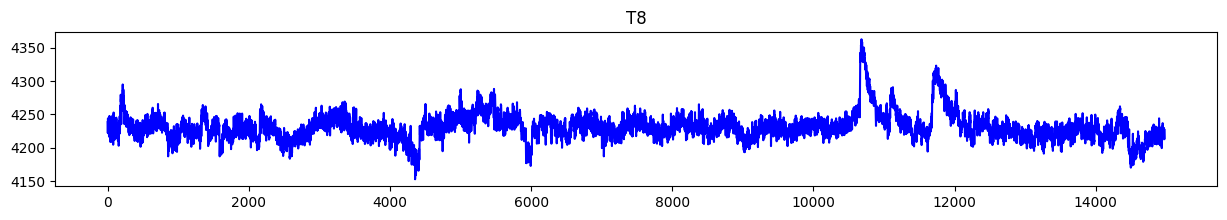

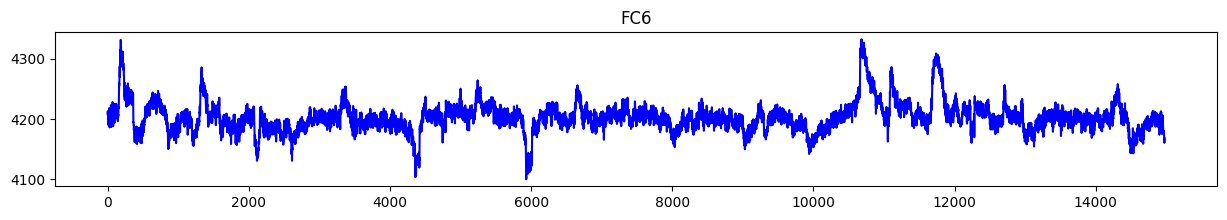

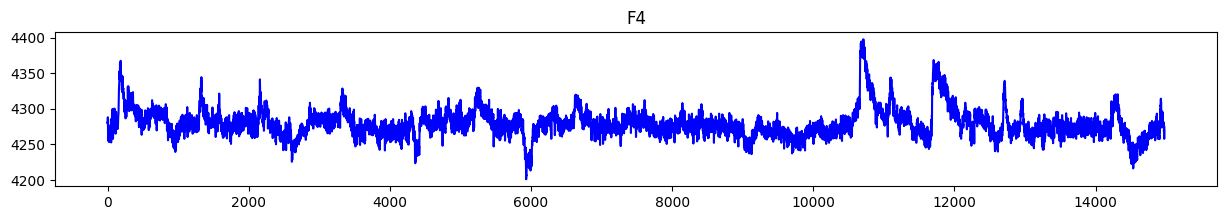

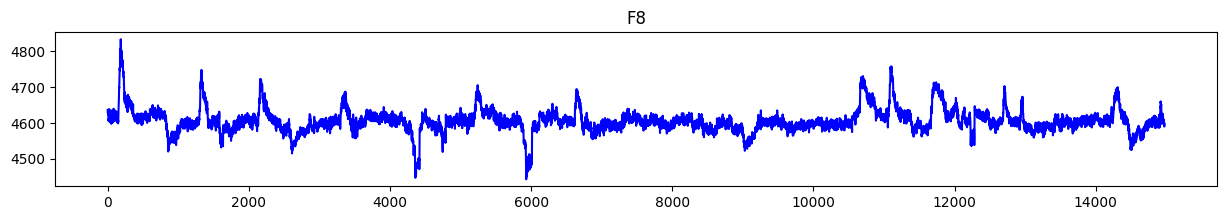

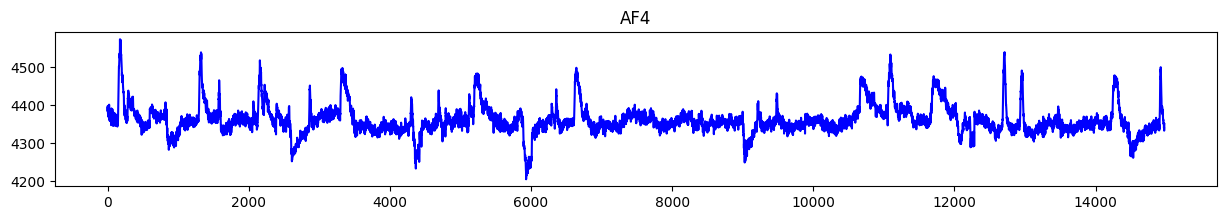

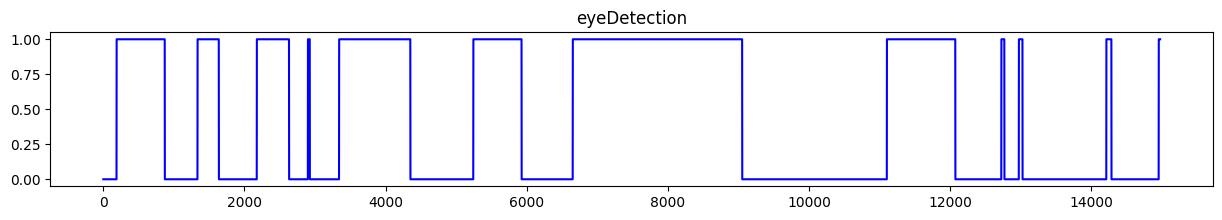

In [ ]:
z_scores = stats.zscore(eeg_data)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 10).all(axis=1)
eeg_data_no_artifacts = eeg_data[filtered_entries]
eeg_data_no_artifacts = eeg_data_no_artifacts.reset_index(drop=True)

# Display Features after outliers removed
for electrode in eeg_data_no_artifacts.columns:
    eeg_data_no_artifacts[electrode].plot(figsize=(15, 2), title=electrode, color="blue")
    plt.show()

### Bandpass filteration

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter settings
lowcut = 0.5
highcut = 50.0
fs = 128
order = 6

# EEG data without the target column
eeg_data = eeg_data_no_artifacts.iloc[:, :-1].values

eeg_data_filtered = butter_bandpass_filter(eeg_data, lowcut, highcut, fs, order)

### Baseline correction

In [ ]:
# Calculating the baseline correction (mean of each electrode)
baseline = eeg_data_filtered.mean(axis=0)
eeg_data_corrected = eeg_data_filtered - baseline

# Reconstructing the DataFrame with the corrected EEG data and the target variable
eeg_data_corrected_df = pd.DataFrame(eeg_data_corrected, columns=eeg_data_no_artifacts.columns[:-1])
eeg_data_corrected_df['eyeDetection'] = eeg_data_no_artifacts['eyeDetection']

In [ ]:
eeg_data_corrected_df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,6.777262,17.270905,10.982411,10.639776,23.047948,-7.525049,-30.572077,13.719245,31.216898,1.216210,-2.781632,-0.399073,-3.268142,17.331455,0
1,5.655480,13.279238,8.403142,14.668588,24.033718,-14.447497,-30.816272,17.977308,26.121519,-8.459576,-10.186912,-1.092870,0.687998,15.048540,0
2,6.402524,15.689260,10.606773,16.622895,27.042262,-17.515872,-37.555351,16.796687,20.749933,-15.335648,-9.163373,-1.440007,1.920845,17.289466,0
3,6.653160,17.576354,14.231037,17.649757,26.472908,-14.057879,-36.748889,13.218187,23.878274,-6.350394,-0.613255,1.456386,0.421983,19.904471,0
4,6.027785,15.976439,12.768639,15.011294,23.835520,-9.758420,-31.373906,10.331696,19.491209,-6.950800,4.556927,7.477537,-1.721489,20.151582,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971,-4.951560,-17.351367,-20.149825,-8.070486,-0.973240,-0.440553,1.922387,8.850560,14.290701,3.959556,-12.451673,-18.261530,-7.650869,0.189522,1
14972,-5.951673,-19.537680,-20.064635,-7.947615,-5.790837,-1.847211,5.499099,6.888490,9.286272,-0.812676,-17.312038,-22.493148,-13.436086,-1.049601,1
14973,-5.825138,-19.462165,-20.230854,-6.633928,-3.055277,-1.586899,4.080559,7.195297,9.854367,-2.624021,-21.684376,-25.082191,-12.604526,1.218632,1
14974,-4.077982,-14.744162,-17.175771,-4.484584,2.770828,-0.861268,1.819257,13.270798,14.219283,-1.548661,-16.943085,-23.104771,-10.530865,4.973192,1


### Plotting data after band-pass filteration and baseline correction

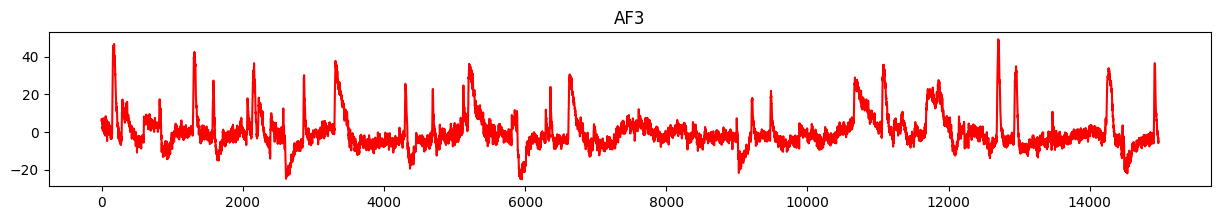

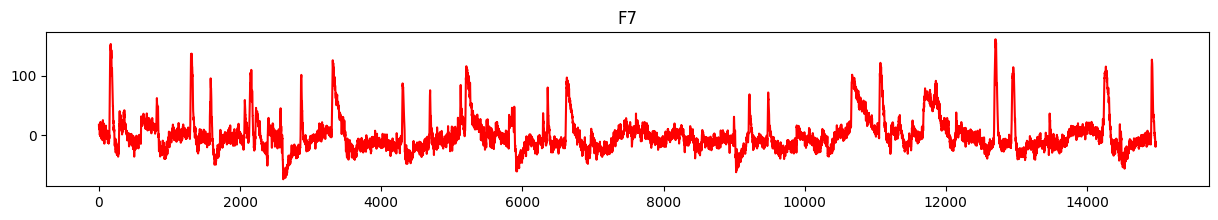

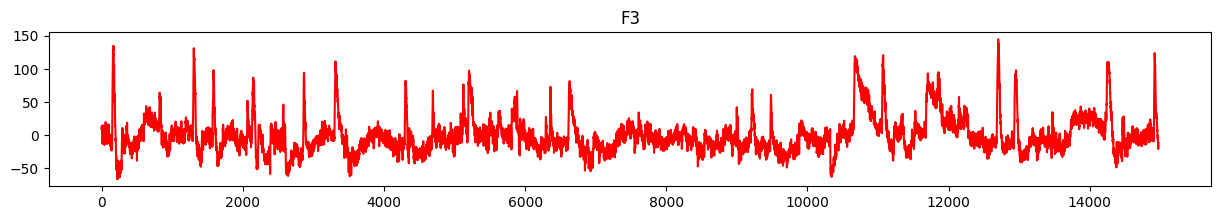

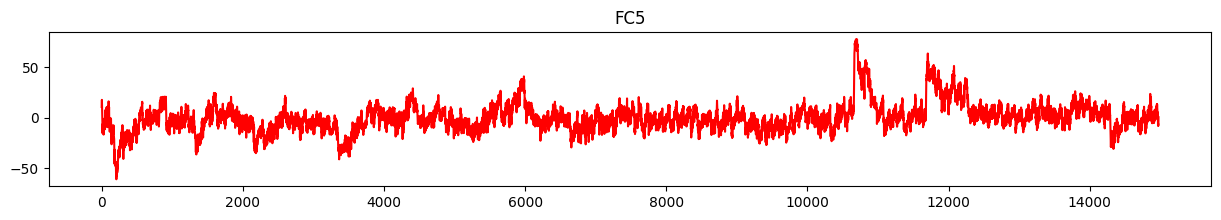

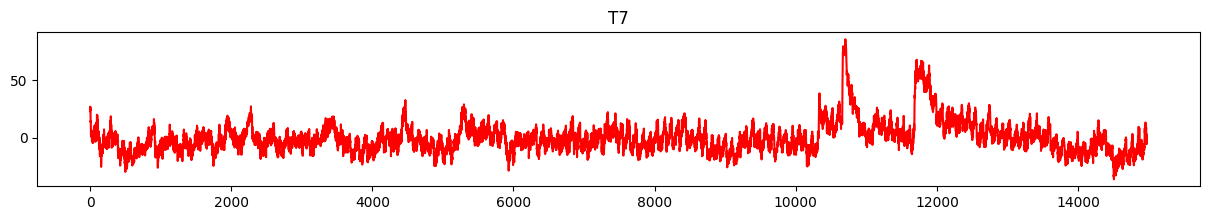

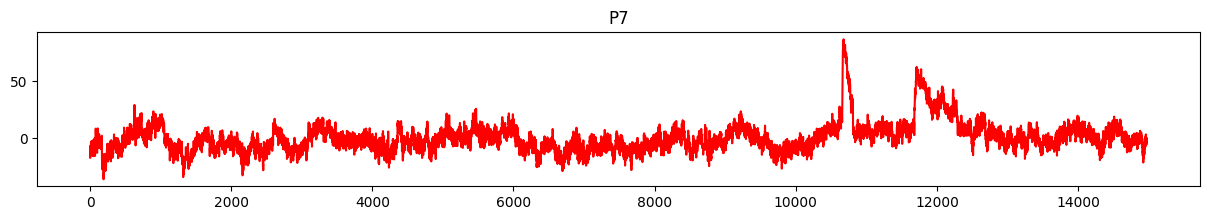

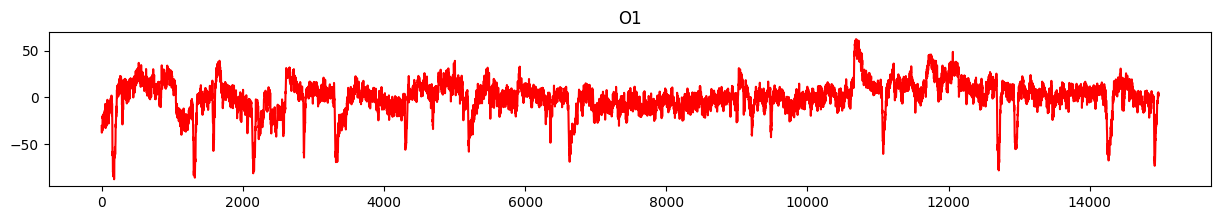

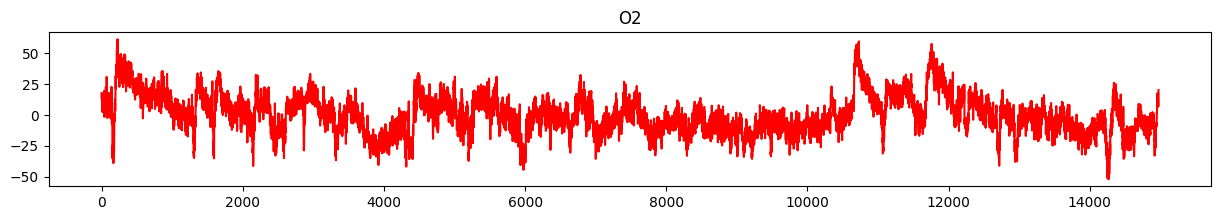

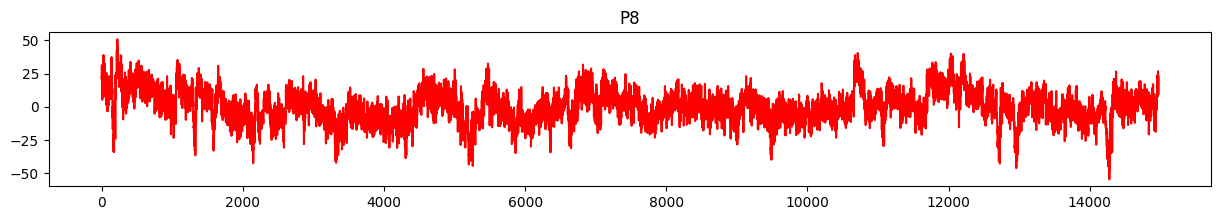

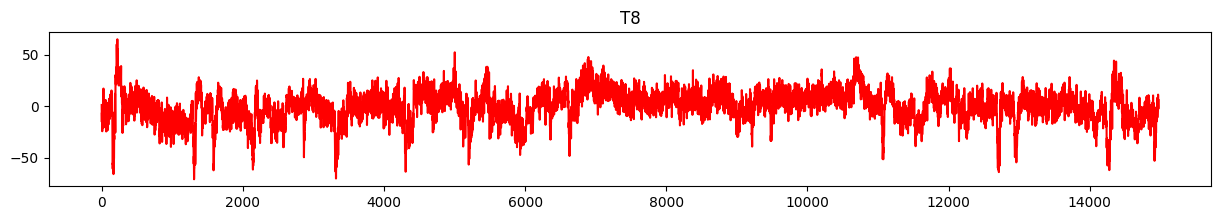

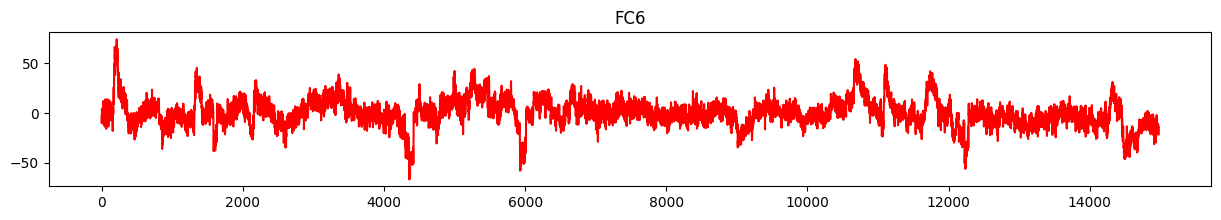

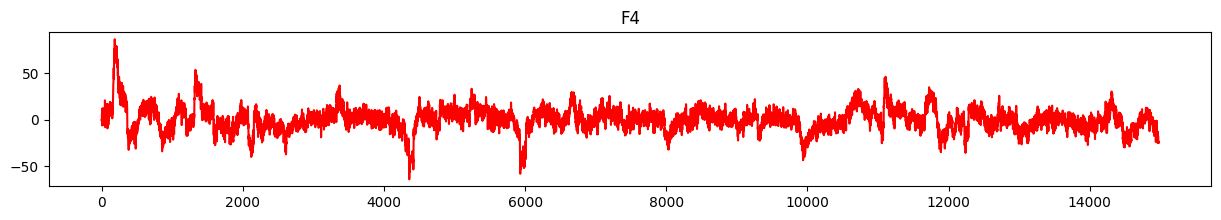

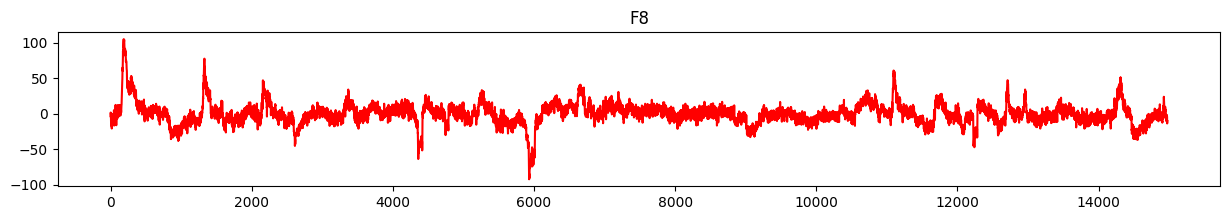

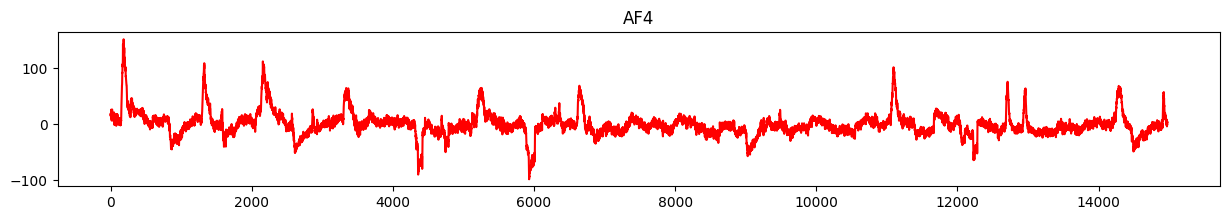

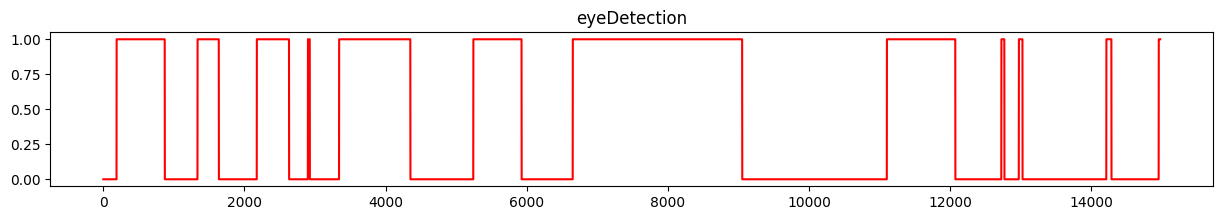

In [ ]:
for electrode in eeg_data_corrected_df.columns:
    eeg_data_corrected_df[electrode].plot(figsize=(15, 2), title=electrode, color='red')
    plt.show()

### Noise removal using **Moving Average Filter**

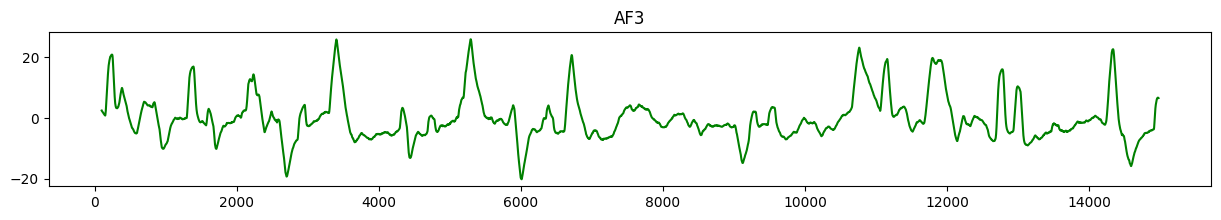

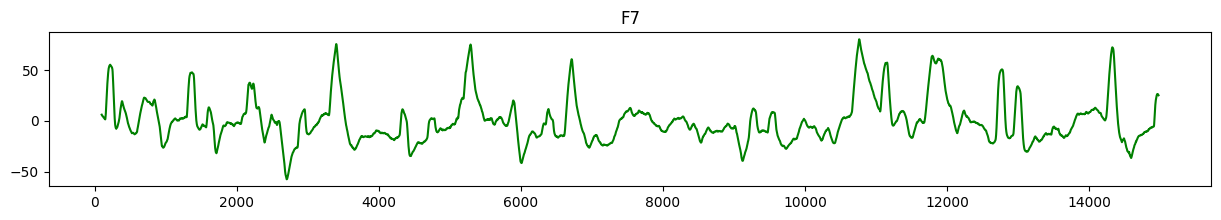

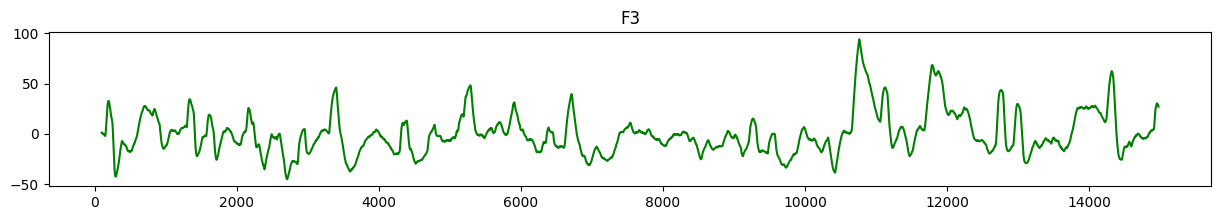

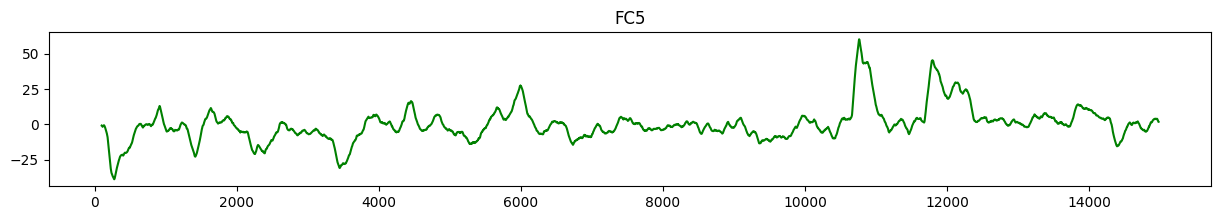

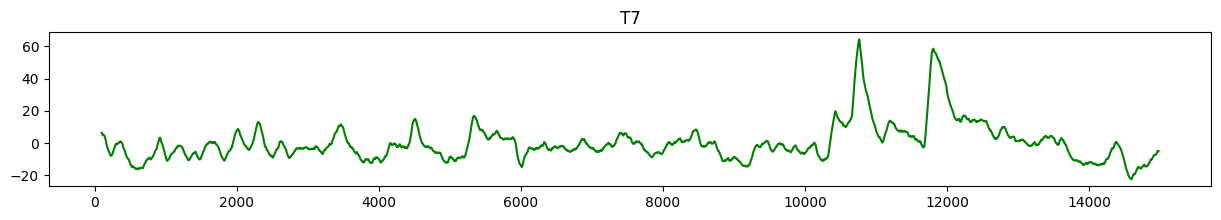

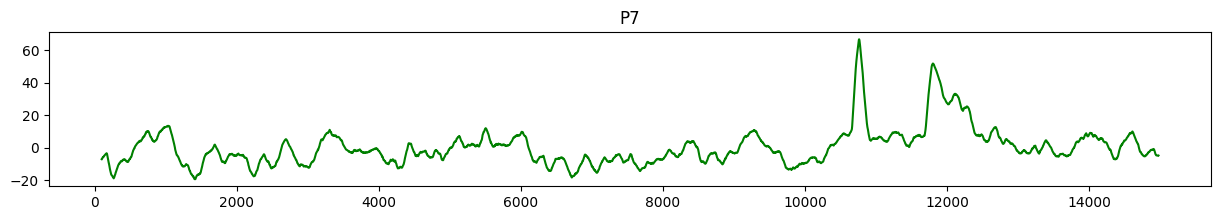

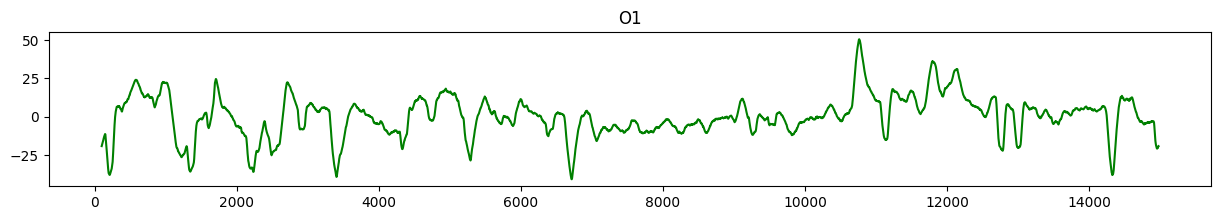

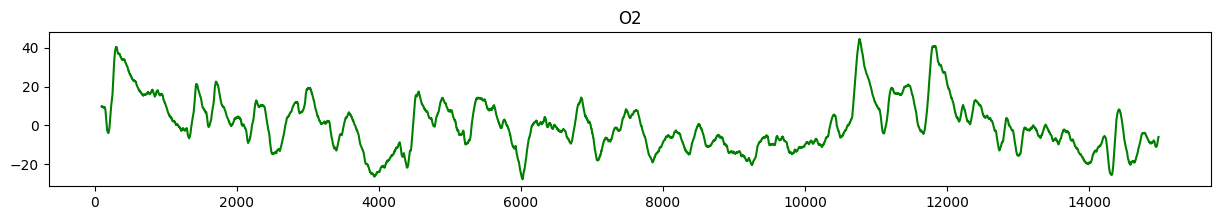

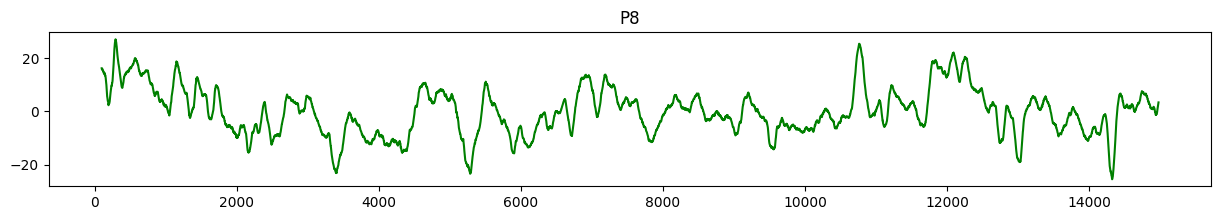

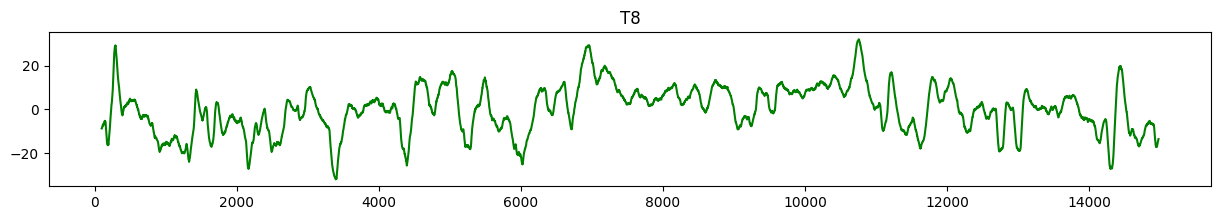

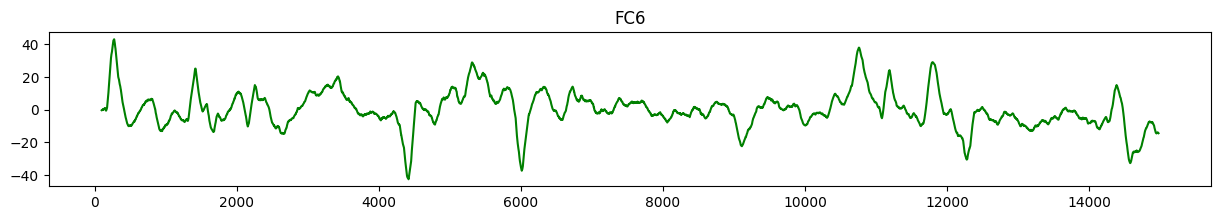

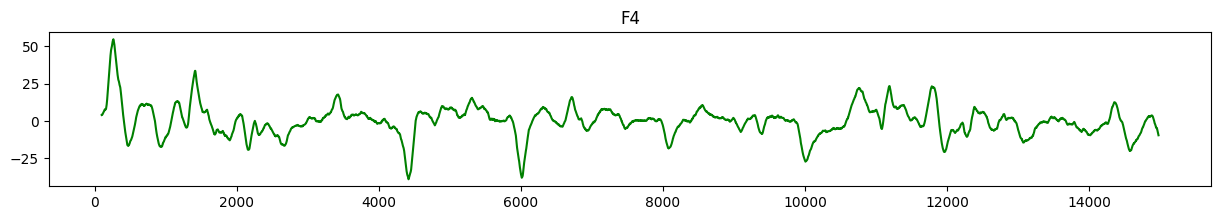

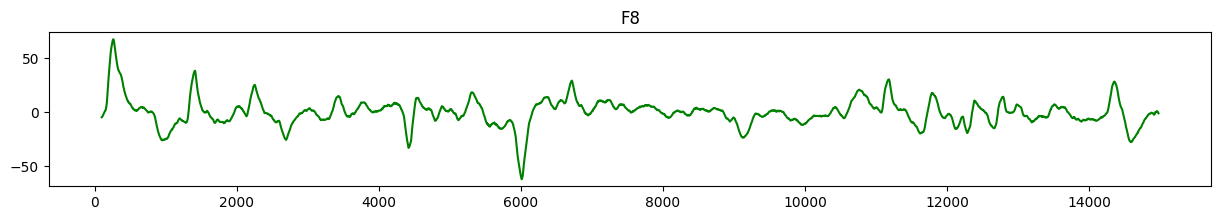

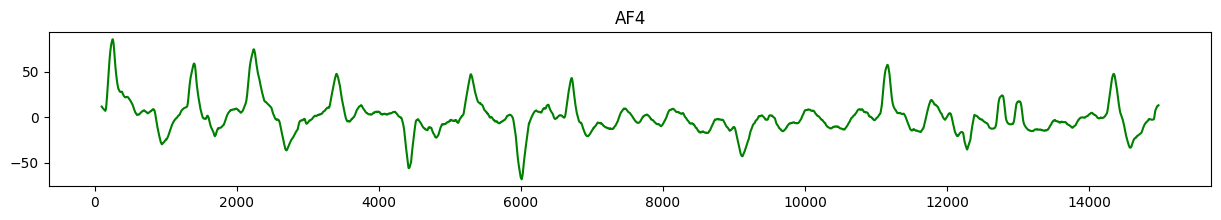

In [ ]:
windowsize=100
noise_removed_df = eeg_data_corrected_df.drop(['eyeDetection'], axis=1)
for i in noise_removed_df.columns:
    noise_removed_df[i].rolling(window=windowsize,center=False).mean().plot(figsize=(15,2),title=i, color='green')
    plt.show()

# Feature Extraction

### Calculate PSD for each channel and epoch

In [ ]:
from scipy.signal import welch

def calculate_psd(eeg_data, fs):
    psd_features = []
    for epoch in eeg_data:
        freqs, psd = welch(epoch, fs=fs)
        psd_features.append(psd)
    return freqs, np.array(psd_features)

freqs, psd_features = calculate_psd(eeg_data_corrected, fs)

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 14, using nperseg = 14
  warnings.warn('nperseg = {0:d} is greater than input length '


In [ ]:
freq_names = [
    "0 - 9 Hz Band",
    "9 - 18 Hz Band",
    "18 - 27 Hz Band",
    "27 - 36 Hz Band",
    "36 - 45 Hz Band",
    "45 - 54 Hz Band",
    "54 - 64 Hz Band",
    "64 - above Hz Band"
]
psd_features_df = pd.DataFrame(psd_features, columns=freq_names)
print(psd_features_df)

       0 - 9 Hz Band  9 - 18 Hz Band  18 - 27 Hz Band  27 - 36 Hz Band  \
0           0.338516        0.648302         7.582249        17.281049   
1           0.518167        0.623820         5.410115        20.188958   
2           1.437141        2.568883         4.779714        21.461053   
3           1.301943        2.878115         7.555666        18.551573   
4           1.123097        2.934774         5.267373        11.011273   
...              ...             ...              ...              ...   
14971       1.633896        5.833449         3.869990         1.683813   
14972       1.599567        6.578892         4.833310         0.878017   
14973       1.403049        6.720322         5.190949         1.601087   
14974       1.310874        6.253621         5.198065         2.772635   
14975       1.826899        8.039705         9.607180         5.584450   

       36 - 45 Hz Band  45 - 54 Hz Band  54 - 64 Hz Band  64 - above Hz Band  
0            13.564387         4

### Calculating statistics

In [ ]:
def calculate_statistics(eeg_data):
    mean = np.mean(eeg_data, axis=1)
    variance = np.var(eeg_data, axis=1)
    skewness = stats.skew(eeg_data, axis=1)
    kurtosis = stats.kurtosis(eeg_data, axis=1)
    return mean, variance, skewness, kurtosis

reading_mean, reading_variance, reading_skewness, reading_kurtosis = calculate_statistics(eeg_data_corrected)

In [ ]:
statistics_cols = ['Reading Mean', 'Reading Variance', 'Reading Skewness', 'Reading Kurtosis']
statistical_features = np.column_stack((reading_mean, reading_variance, reading_skewness, reading_kurtosis))
statistical_features_df = pd.DataFrame(statistical_features, columns=statistics_cols)
statistical_features_df

,Reading Mean,Reading Variance,Reading Skewness,Reading Kurtosis
0,6.261153,216.774261,-0.694943,0.640836
1,4.348029,241.028682,-0.609196,-0.335724
2,3.722171,304.787610,-0.839744,-0.108787
3,5.978007,271.422848,-1.075524,0.762941
4,6.130287,201.586184,-1.167296,0.975799
...,...,...,...,...
14971,-4.363456,98.596465,0.028591,-0.860428
14972,-6.754953,102.349799,-0.055087,-1.226151
14973,-6.888609,117.544389,-0.234673,-1.173513
14974,-4.029842,119.338843,-0.017705,-0.915888


### Concatenating columns after feature extraction

In [ ]:
prepared_data = pd.concat([eeg_data_corrected_df, psd_features_df, statistical_features_df], axis=1)
prepared_data

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,...,18 - 27 Hz Band,27 - 36 Hz Band,36 - 45 Hz Band,45 - 54 Hz Band,54 - 64 Hz Band,64 - above Hz Band,Reading Mean,Reading Variance,Reading Skewness,Reading Kurtosis
0,6.777262,17.270905,10.982411,10.639776,23.047948,-7.525049,-30.572077,13.719245,31.216898,1.216210,...,7.582249,17.281049,13.564387,4.857873,0.227150,0.000038,6.261153,216.774261,-0.694943,0.640836
1,5.655480,13.279238,8.403142,14.668588,24.033718,-14.447497,-30.816272,17.977308,26.121519,-8.459576,...,5.410115,20.188958,16.616835,4.728905,0.201862,0.000182,4.348029,241.028682,-0.609196,-0.335724
2,6.402524,15.689260,10.606773,16.622895,27.042262,-17.515872,-37.555351,16.796687,20.749933,-15.335648,...,4.779714,21.461053,20.466688,7.260099,0.478493,0.000183,3.722171,304.787610,-0.839744,-0.108787
3,6.653160,17.576354,14.231037,17.649757,26.472908,-14.057879,-36.748889,13.218187,23.878274,-6.350394,...,7.555666,18.551573,16.167327,6.394511,0.421519,0.000235,5.978007,271.422848,-1.075524,0.762941
4,6.027785,15.976439,12.768639,15.011294,23.835520,-9.758420,-31.373906,10.331696,19.491209,-6.950800,...,5.267373,11.011273,12.491987,5.680886,0.311561,0.001053,6.130287,201.586184,-1.167296,0.975799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971,-4.951560,-17.351367,-20.149825,-8.070486,-0.973240,-0.440553,1.922387,8.850560,14.290701,3.959556,...,3.869990,1.683813,0.504855,0.006047,0.009937,0.002710,-4.363456,98.596465,0.028591,-0.860428
14972,-5.951673,-19.537680,-20.064635,-7.947615,-5.790837,-1.847211,5.499099,6.888490,9.286272,-0.812676,...,4.833310,0.878017,0.106870,0.137785,0.056558,0.004548,-6.754953,102.349799,-0.055087,-1.226151
14973,-5.825138,-19.462165,-20.230854,-6.633928,-3.055277,-1.586899,4.080559,7.195297,9.854367,-2.624021,...,5.190949,1.601087,0.270017,0.104656,0.043452,0.002903,-6.888609,117.544389,-0.234673,-1.173513
14974,-4.077982,-14.744162,-17.175771,-4.484584,2.770828,-0.861268,1.819257,13.270798,14.219283,-1.548661,...,5.198065,2.772635,0.733889,0.065487,0.006046,0.002362,-4.029842,119.338843,-0.017705,-0.915888


# Model building

### Standardization and data splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = prepared_data.drop("eyeDetection", axis=1)  # Features
X_scaled = scaler.fit_transform(X) # Features after scaling

y = prepared_data['eyeDetection']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Model training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250)

### Model prediction

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:0.2f} %")
print('\n')
print("Classification Report: ")
print()
print(report)

Model Accuracy: 92.26 %


Classification Report: 

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1636
           1       0.94      0.89      0.91      1360

    accuracy                           0.92      2996
   macro avg       0.92      0.92      0.92      2996
weighted avg       0.92      0.92      0.92      2996



# Connecting model output predictions to Arduino

In [ ]:
!pip install pyserial

In [ ]:
import serial
model_predictions = y_pred.copy()

ser = serial.Serial('COM6', 9600)  # COM3 is an example, use the actual port your Arduino is connected to

# Convert the array to a string for transmission
data_string = ' '.join(map(str, model_predictions))
data_string = data_string + '\n'  # Add a newline character to signal the end of the message

# Send the data to the Arduino
ser.write(data_string.encode())

# Close the serial connection when done
ser.close()


SerialException: ignored